In [ ]:
## POSSIBLE TODO

# Compare complex models with sessions nested within subject to simple models with subjects onyl
# to do that, you'd need to get the model fit statistics for each, and then compare them with ANOVA (like you did LC4MP meta)

# here is some code for getting the model fit statistics
log_likelihood = results_af7.llf  # Log-Likelihood
aic = results_af7.aic  # Akaike Information Criterion
bic = results_af7.bic  # Bayesian Information Criterion

print(f"Log-Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


##### Also Possible TODO
# consider how results change as a function of outlier removal
# maybe remove outliers at +/- .1 intervals, so values > .1, .2, .3, .4, .5 are removed

In [1]:
# Load dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt

/tmp/ipykernel_42696/146719294.py:10: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [13]:
# Read in the structured correlation data
# Update filename based on epoch duration

corr_df = pd.read_csv("merged_corr_df_1s_epoch.csv")
len(corr_df)

233

In [3]:
# This filters out extreme values that are > +/-.3
# This is a brute-force way of excluding outliers
filter_index = (corr_df[["TP10", "AF7", "AF8", "TP9"]] > 0.3).any(1)  | (corr_df[["TP10", "AF7", "AF8", "TP9"]] < -0.3).any(1)

# Print how many are filtered out
filter_index.sum()

12

In [14]:
# If you want to remove outliers identified above, do it by uncommenting this code
corr_df = corr_df[~filter_index]
len(corr_df)

221

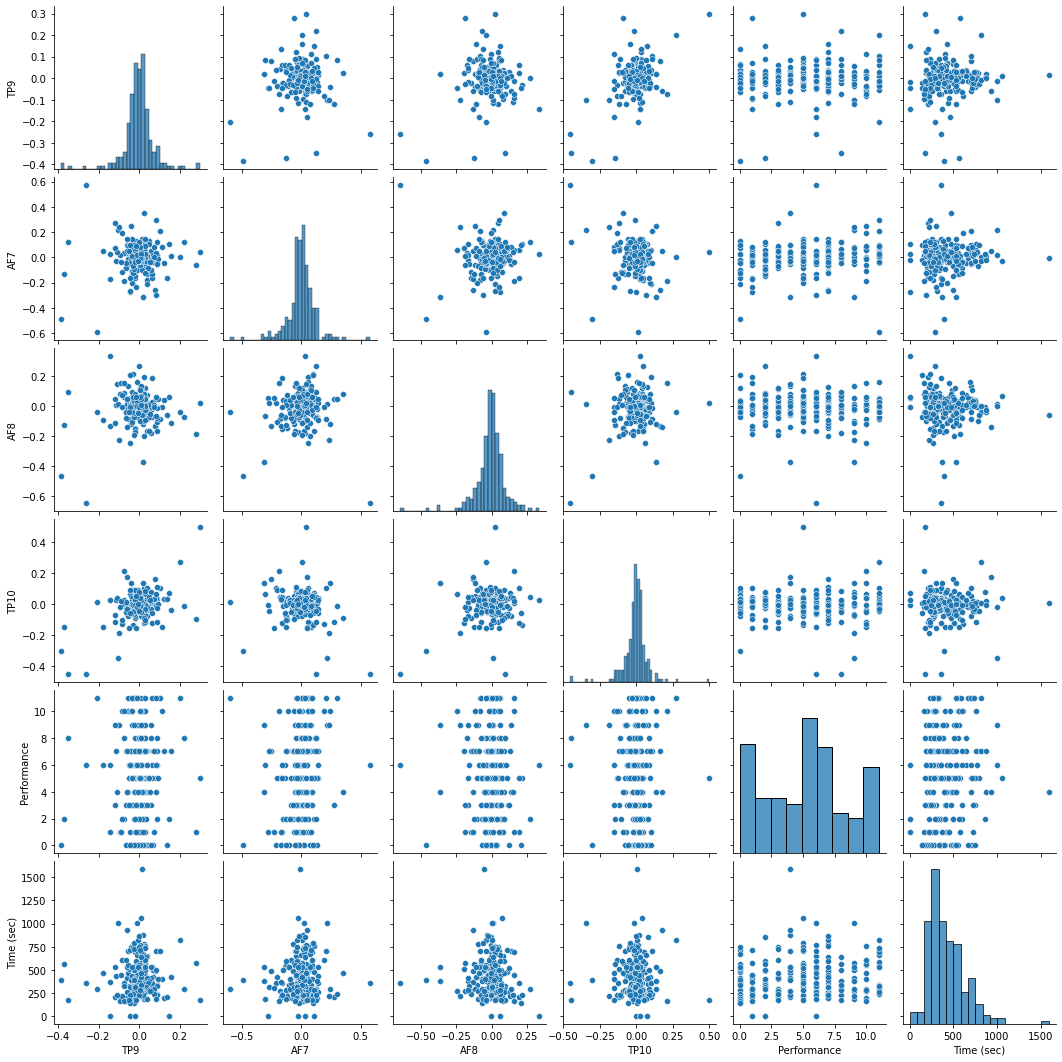

In [4]:
# Get some insights into the data
sns.pairplot(corr_df[["TP9", "AF7", "AF8", "TP10", "Performance", "Time (sec)"]])
plt.show()

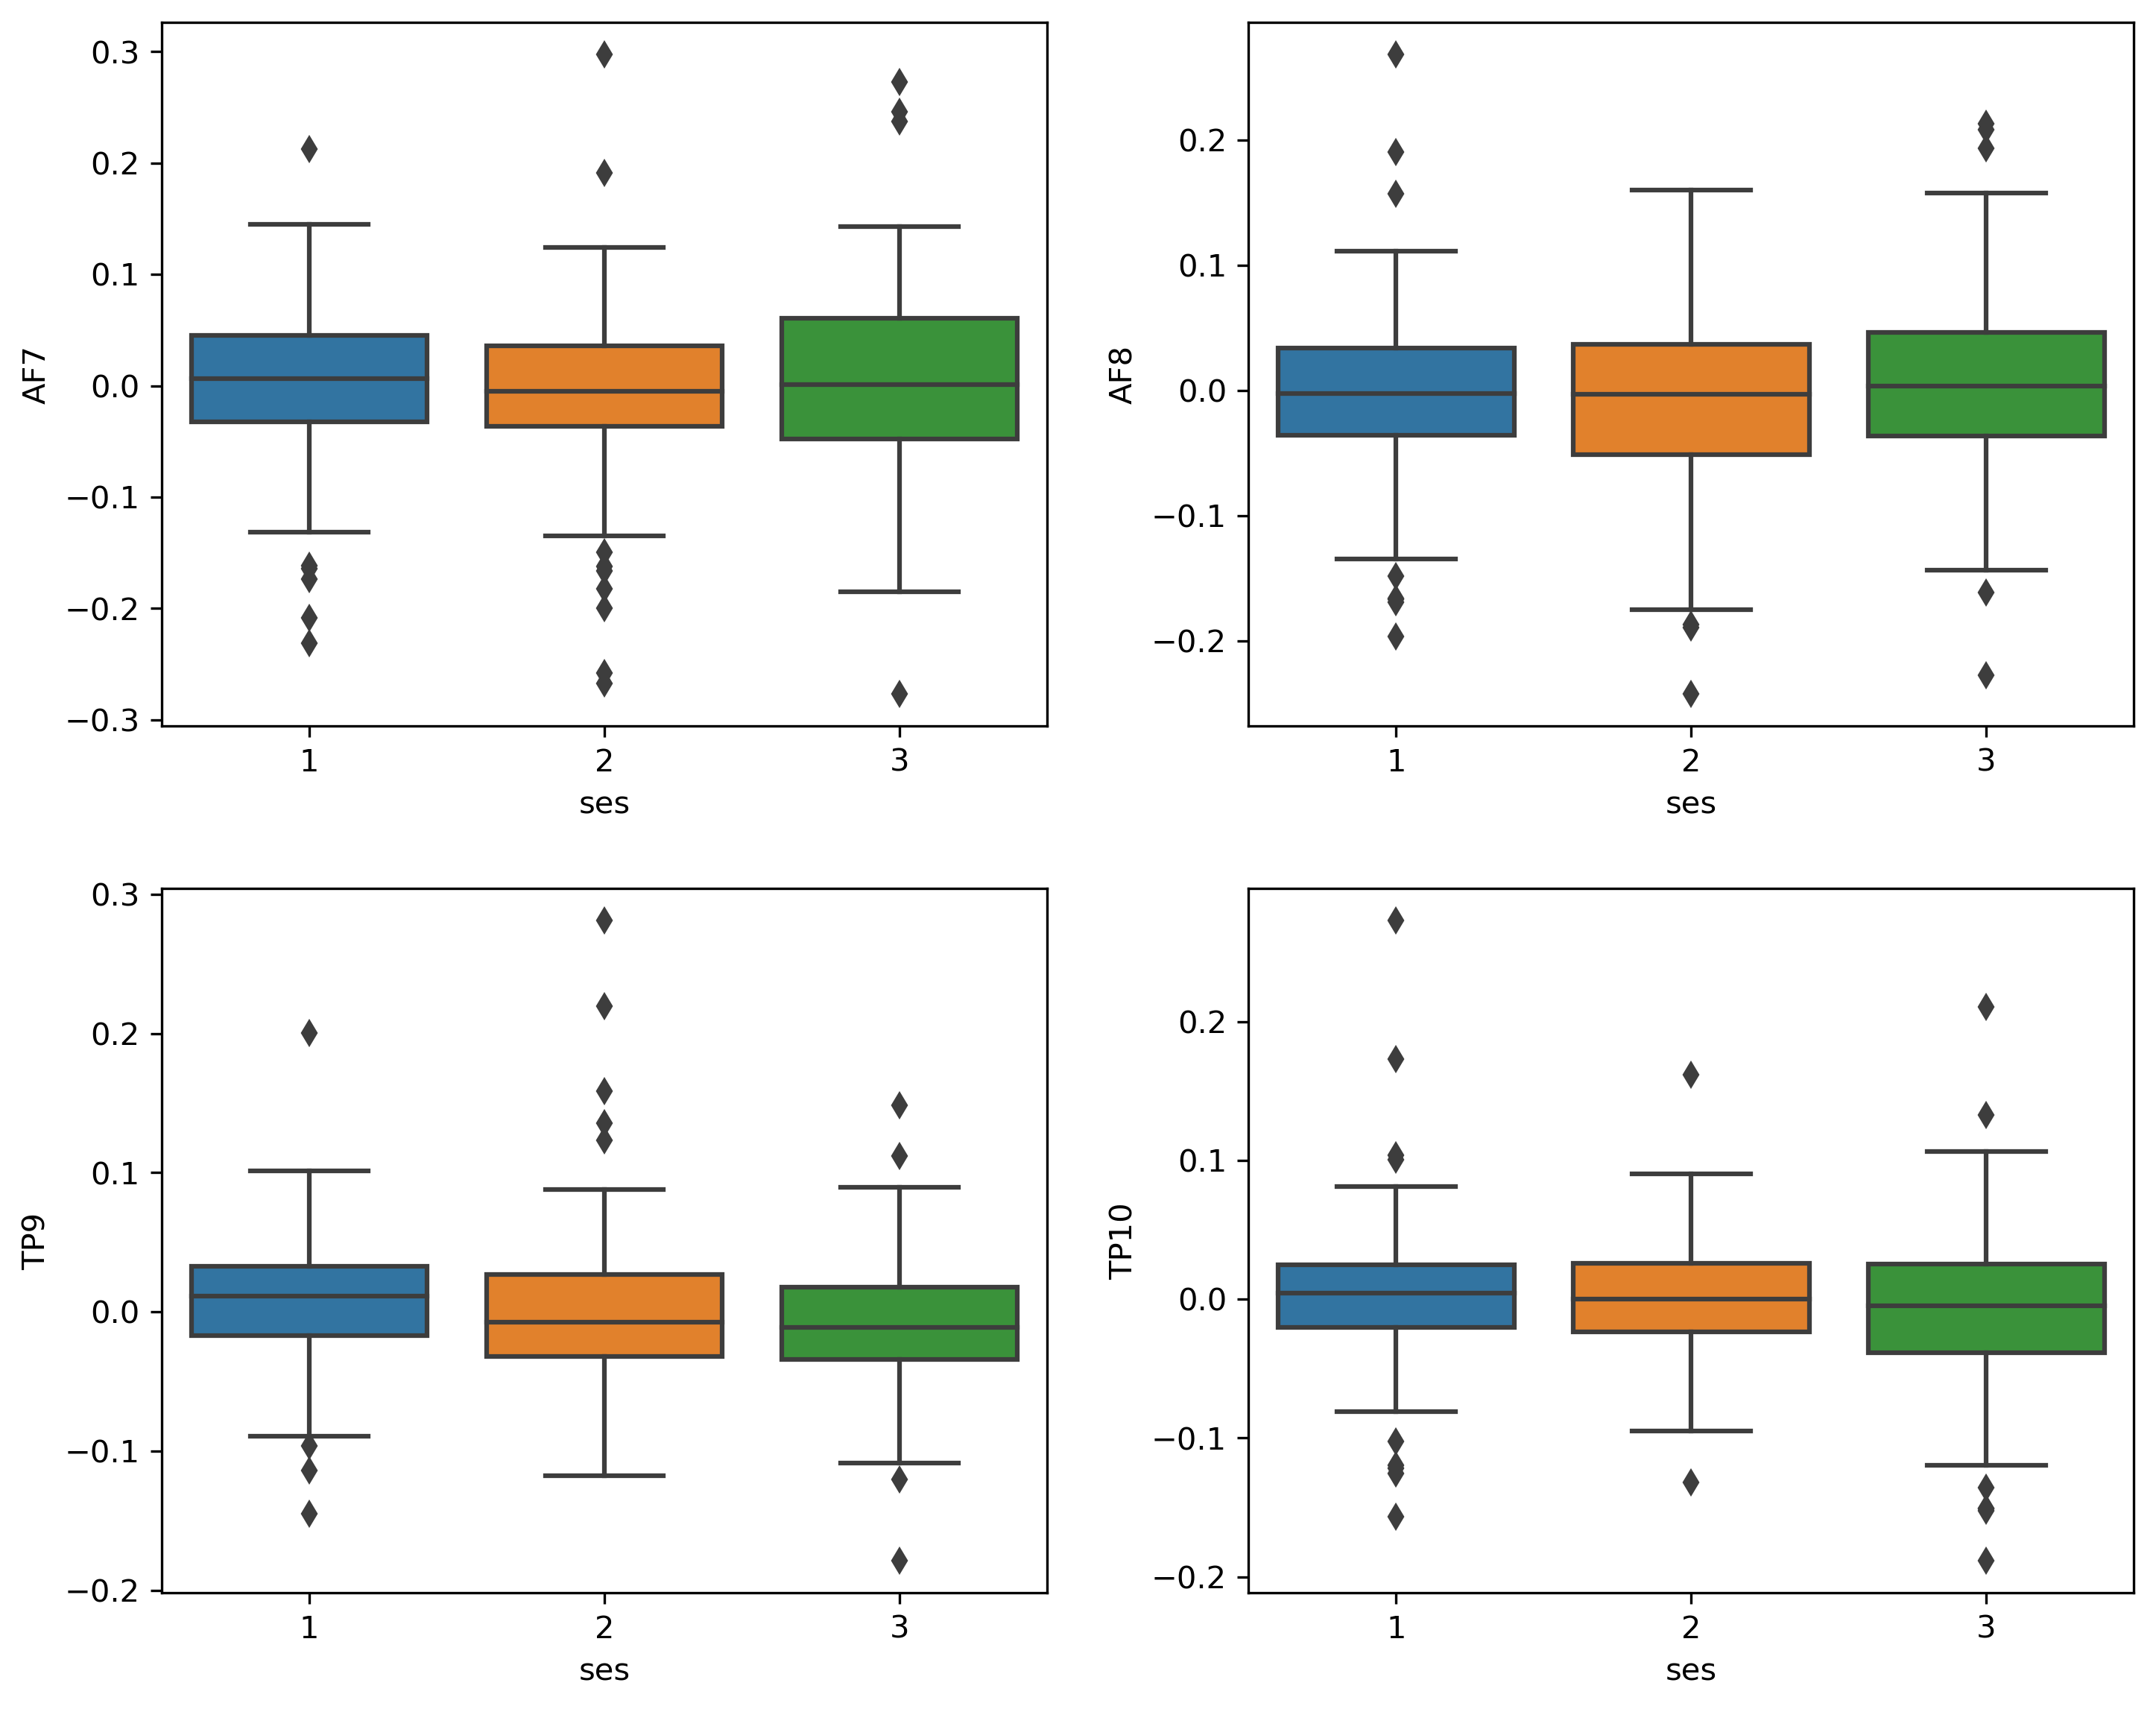

In [9]:
# Plot boxplot of electrode ISC by session
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=300)  # Increased figure size for better spacing

channels = ["AF7", "AF8", "TP9", "TP10"]
for i, channel in enumerate(channels):
    sns.boxplot(x="ses", y=channel, data=corr_df, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_ylabel(channel)  # Explicitly set y-axis label to the channel name

plt.tight_layout(pad=2.0)  # Increase padding between plots for clarity and to prevent cutting off labels
plt.show()

In [15]:
# Test if ISCs in a given electrode increase as a function of session
# This would test if participant ISCs increase over time

# Fit a mixed model
# This formula specifies a model with:
    # ISC for a given electrode as the DV
    # ses as a fixed effect
    # subject as a random intercepts

# This model is fir for ISCs in the AF7 electrode
model = smf.mixedlm("AF7 ~ ses", corr_df, groups=corr_df["subj"])
result = model.fit()

print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AF7     
No. Observations: 221     Method:             REML    
No. Groups:       119     Scale:              0.0074  
Min. group size:  1       Log-Likelihood:     215.9200
Max. group size:  3       Converged:          Yes     
Mean group size:  1.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   -0.003    0.015 -0.207 0.836 -0.034  0.027
ses          0.002    0.007  0.287 0.774 -0.012  0.016
Group Var    0.000    0.008                           



/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [16]:
# Test if ISCs in a given electrode increase as a function of session
# This would test if participant ISCs increase over time

# Fit a mixed model
# This formula specifies a model with:
    # ISC for a given electrode as the DV
    # ses as a fixed effect
    # subject as a random intercepts

# This model is fir for ISCs in the AF8 electrode
model = smf.mixedlm("AF8 ~ ses", corr_df, groups=corr_df["subj"])
result = model.fit()

print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AF8     
No. Observations: 221     Method:             REML    
No. Groups:       119     Scale:              0.0061  
Min. group size:  1       Log-Likelihood:     242.2309
Max. group size:  3       Converged:          Yes     
Mean group size:  1.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   -0.012    0.014 -0.844 0.399 -0.039  0.015
ses          0.005    0.006  0.772 0.440 -0.008  0.018
Group Var    0.000    0.009                           



/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [17]:
# Test if ISCs in a given electrode increase as a function of session
# This would test if participant ISCs increase over time

# Fit a mixed model
# This formula specifies a model with:
    # ISC for a given electrode as the DV
    # ses as a fixed effect
    # subject as a random intercepts

# This model is fir for ISCs in the TP9 electrode
model = smf.mixedlm("TP9 ~ ses", corr_df, groups=corr_df["subj"])
result = model.fit()

print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: TP9     
No. Observations: 221     Method:             REML    
No. Groups:       119     Scale:              0.0029  
Min. group size:  1       Log-Likelihood:     316.3971
Max. group size:  3       Converged:          Yes     
Mean group size:  1.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.020    0.010  2.057 0.040  0.001  0.040
ses         -0.009    0.005 -1.913 0.056 -0.017  0.000
Group Var    0.000    0.006                           



/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [18]:
# Test if ISCs in a given electrode increase as a function of session
# This would test if participant ISCs increase over time

# Fit a mixed model
# This formula specifies a model with:
    # ISC for a given electrode as the DV
    # ses as a fixed effect
    # subject as a random intercepts

# This model is fir for ISCs in the TP10 electrode
model = smf.mixedlm("TP10 ~ ses", corr_df, groups=corr_df["subj"])
result = model.fit()

print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: TP10    
No. Observations: 221     Method:             REML    
No. Groups:       119     Scale:              0.0035  
Min. group size:  1       Log-Likelihood:     301.7757
Max. group size:  3       Converged:          Yes     
Mean group size:  1.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.008    0.011  0.798 0.425 -0.012  0.029
ses         -0.005    0.005 -1.032 0.302 -0.015  0.005
Group Var    0.000    0.005                           



/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/rwhuskey/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
# Test if ISCs in a given electrode increase as a function of session
# This would test if participant ISCs increase over time
# These fit simpler models in case the more complex mixed models have convergence issues

# Fit an ols regression
# This formula specifies a model with:
    #ISC for a given electrode as the DV
    # ses as the IV
moore_lm = ols('AF7 ~ C(ses)',
             data=corr_df).fit()

# Print results 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

# Fit an ols regression
# This formula specifies a model with:
    #ISC for a given electrode as the DV
    # ses as the IV
moore_lm = ols('AF8 ~ C(ses)',
             data=corr_df).fit()

# Print results 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

# Fit an ols regression
# This formula specifies a model with:
    #ISC for a given electrode as the DV
    # ses as the IV
moore_lm = ols('TP9 ~ C(ses)',
             data=corr_df).fit()

# Print results 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

# Fit an ols regression
# This formula specifies a model with:
    #ISC for a given electrode as the DV
    # ses as the IV
moore_lm = ols('TP10 ~ C(ses)',
             data=corr_df).fit()

# Print results 
table = sm.stats.anova_lm(moore_lm) # Type 2 ANOVA DataFrame
print(table)

             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.010313  0.005156  0.663308  0.516181
Residual  218.0  1.694688  0.007774       NaN       NaN
             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.015170  0.007585  1.246025  0.289686
Residual  218.0  1.327041  0.006087       NaN       NaN
             df    sum_sq   mean_sq        F    PR(>F)
C(ses)      2.0  0.013251  0.006625  2.12898  0.121425
Residual  218.0  0.678411  0.003112      NaN       NaN
             df    sum_sq   mean_sq         F    PR(>F)
C(ses)      2.0  0.004900  0.002450  0.688283  0.503527
Residual  218.0  0.775952  0.003559       NaN       NaN


In [22]:
# Check to see if ISC for each electrode is correlated with task performance
# This is to just get a feel for the data

print(pearsonr(corr_df.AF7, corr_df.Performance))
print(pearsonr(corr_df.AF8, corr_df.Performance))
print(pearsonr(corr_df.TP9, corr_df.Performance))
print(pearsonr(corr_df.TP10, corr_df.Performance))

PearsonRResult(statistic=0.21544958468424819, pvalue=0.001270077293255047)
PearsonRResult(statistic=-0.1283204963327385, pvalue=0.05682101643027268)
PearsonRResult(statistic=0.022247654510821262, pvalue=0.7422310348438632)
PearsonRResult(statistic=0.014341091210223497, pvalue=0.8321089511702499)


In [23]:
# Fit a really complex mixed model that deals with sessions nested within sujects
# This model:
    # "Performance ~ Electrode" defines "Performance" as the DV and"AF7" as an independent variable (fixed effect)
    # groups=corr_df["subj"] specifies that the random intercepts should vary by "subj" to account for the non-independence of observations within subjects
    #re_formula="1" indicates that there is a random intercept for each subject
    # vc_formula={"ses": "0 + C(ses)"} specifies a variance component for "ses", treating sessions as a categorical variable (with C(ses)) and allowing for varying intercepts by "ses" without a slope
# This may not converge, so we fit simpler models below

# Define the models
model_af7 = smf.mixedlm("Performance ~ AF7", data=corr_df, groups=corr_df["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_af8 = smf.mixedlm("Performance ~ AF8", data=corr_df, groups=corr_df["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp9 = smf.mixedlm("Performance ~ TP9", data=corr_df, groups=corr_df["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

model_tp10 = smf.mixedlm("Performance ~ TP10", data=corr_df, groups=corr_df["subj"],
                    re_formula="1", vc_formula={"ses": "0 + C(ses)"})

# Fit the model
results_af7 = model_af7.fit()
results_af8 = model_af8.fit()
results_tp9 = model_tp9.fit()
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_af7.summary())
print(results_af8.summary())
print(results_tp9.summary())
print(results_tp10.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 221     Method:             REML       
No. Groups:       119     Scale:              2.9530     
Min. group size:  1       Log-Likelihood:     -550.6885  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.9                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.237     0.264  19.868  0.000   4.720   5.754
AF7         7.238     2.113   3.426  0.001   3.097  11.379
Group Var   5.282                                         
ses Var     1.987                                         

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 221     Method:             REML       
No. Groups:       119     

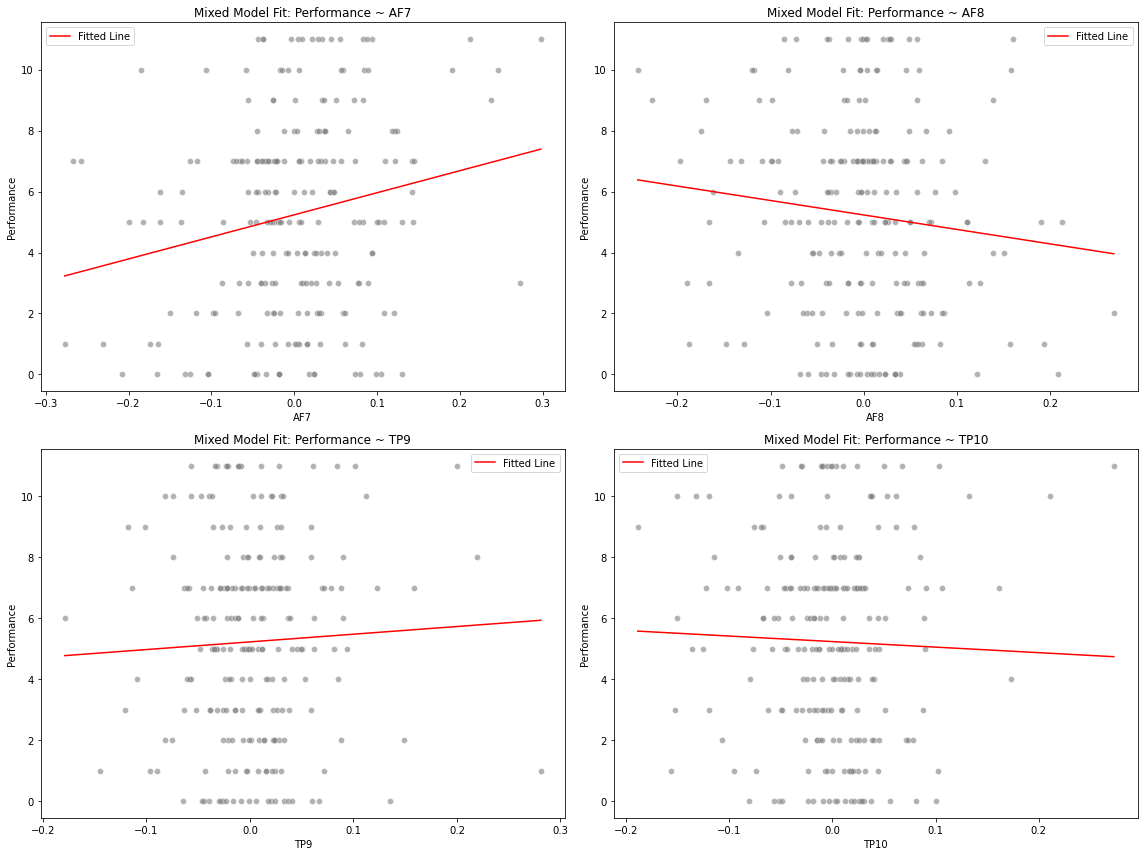

In [24]:
# Plot results for all models

# Define the electrodes to model
electrodes = ['AF7', 'AF8', 'TP9', 'TP10']

# Prepare the grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, electrode in enumerate(electrodes):
    # Fit the model for the current electrode
    model = smf.mixedlm(f"Performance ~ {electrode}", data=corr_df, groups=corr_df["subj"], re_formula="1",
                        vc_formula={"ses": "0 + C(ses)"}).fit()
    
    # Get predicted values for a range of electrode values
    electrode_values = np.linspace(corr_df[electrode].min(), corr_df[electrode].max(), 100)
    predicted_performance = model.params['Intercept'] + model.params[electrode] * electrode_values
    
    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plot the observed data
    sns.scatterplot(x=electrode, y='Performance', data=corr_df, color='gray', alpha=0.6, ax=ax)
    
    # Plot the fitted line
    ax.plot(electrode_values, predicted_performance, color='red', label='Fitted Line')
    
    # Set titles and labels
    ax.set_xlabel(electrode)
    ax.set_ylabel('Performance')
    ax.set_title(f'Mixed Model Fit: Performance ~ {electrode}')
    ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Check to see if Performance increases as a function of session
# But properly modeled to account for dependency in the data

# Fit a mixed model with:
    # Performance as the outcome variable
    # ISC for each electrode as the IV recognizing that these measurements are nested within:
        # subject
        # NOTE: sessions are also nested within subject, but convergence issues happen for such complex models

# In this model:
    # groups=corr_df["subj"] specifies random intercepts that vary by "subj" to account for non-independence of observations within subjects
    # re_formula="1" indicates that there is a random intercept for each subject

In [25]:
# Define the model
model_af7 = smf.mixedlm("Performance ~ AF7", data=corr_df, groups=corr_df["subj"],
                                    re_formula="1")

# Fit the model
results_af7 = model_af7.fit()

# Print the summary of the model fit
print(results_af7.summary())

# Also fit a simple OSL in case there are convergence issues
model_ols_af7 = smf.ols("Performance ~ AF7", data=corr_df).fit()
print(model_ols_af7.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 221     Method:             REML       
No. Groups:       119     Scale:              4.9400     
Min. group size:  1       Log-Likelihood:     -550.6885  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.9                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.237     0.264  19.868  0.000   4.720   5.754
AF7         7.238     2.114   3.423  0.001   3.094  11.382
Group Var   5.282     0.683                               

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:     

In [26]:
# Define the model
model_af8 = smf.mixedlm("Performance ~ AF8", data=corr_df, groups=corr_df["subj"],
                                    re_formula="1")

# Fit the model
results_af8 = model_af8.fit()

# Print the summary of the model fit
print(results_af8.summary())

# Also fit a simple OSL in case there are convergence issues
model_ols_af8 = smf.ols("Performance ~ AF8", data=corr_df).fit()
print(model_ols_af8.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 221     Method:             REML       
No. Groups:       119     Scale:              5.1605     
Min. group size:  1       Log-Likelihood:     -554.3218  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.9                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.233     0.267  19.601  0.000   4.709   5.756
AF8        -4.741     2.374  -1.997  0.046  -9.393  -0.088
Group Var   5.365     0.684                               

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:     

In [27]:
# Define the model
model_tp9 = smf.mixedlm("Performance ~ TP9", data=corr_df, groups=corr_df["subj"],
                                    re_formula="1")

# Fit the model
results_tp9 = model_tp9.fit()

# Print the summary of the model fit
print(results_tp9.summary())

# Also fit a simple OSL in case there are convergence issues
model_ols_tp9 = smf.ols("Performance ~ TP9", data=corr_df).fit()
print(model_ols_tp9.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 221     Method:             REML       
No. Groups:       119     Scale:              5.2299     
Min. group size:  1       Log-Likelihood:     -555.6713  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.9                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.222     0.270  19.349  0.000   4.693   5.751
TP9         2.520     3.428   0.735  0.462  -4.199   9.239
Group Var   5.473     0.693                               

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:     

In [28]:
# Define the model
model_tp10 = smf.mixedlm("Performance ~ TP10", data=corr_df, groups=corr_df["subj"],
                                    re_formula="1")

# Fit the model
results_tp10 = model_tp10.fit()

# Print the summary of the model fit
print(results_tp10.summary())

# Also fit a simple OSL in case there are convergence issues
model_ols_tp10 = smf.ols("Performance ~ TP10", data=corr_df).fit()
print(model_ols_tp10.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 221     Method:             REML       
No. Groups:       119     Scale:              5.2311     
Min. group size:  1       Log-Likelihood:     -555.8684  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.9                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.232     0.270  19.407  0.000   4.703   5.760
TP10       -1.818     3.122  -0.582  0.560  -7.938   4.301
Group Var   5.485     0.696                               

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:     

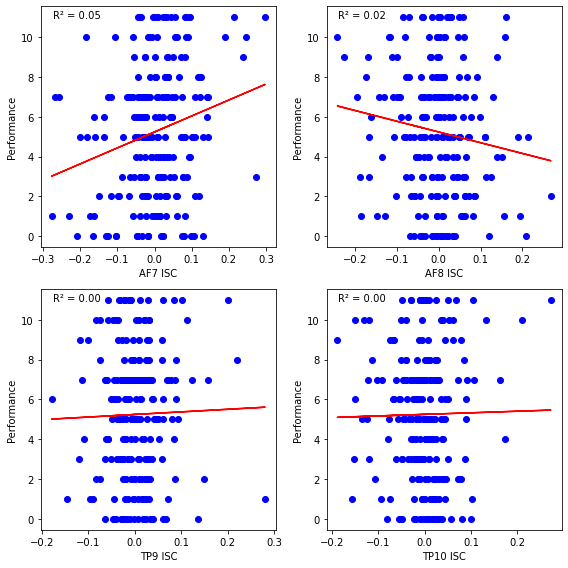

In [29]:
# Plot a scatter plot of performance by ISC for each electrode
# Show regression line and R^2 value
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
channels = ["AF7", "AF8", "TP9", "TP10"]

for i, channel in enumerate(channels):
    x = corr_df[channel]
    y = corr_df["Performance"]
    # Fit linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # Plot scatter plot
    axs[i//2, i%2].scatter(x, y, color="blue")
    # Plot regression line
    axs[i//2, i%2].plot(x, intercept + slope*x, color="red")
    # Annotate r^2 value
    axs[i//2, i%2].text(0.05, 0.95, 'R² = {:.2f}'.format(r_value**2), transform=axs[i//2, i%2].transAxes)
    # Set legends for horizontal and vertical axis
    axs[i//2, i%2].set_xlabel(channel + " ISC")
    axs[i//2, i%2].set_ylabel("Performance")

plt.tight_layout()
plt.show()